# EDA Portfolio Project

I need to analyze the data set to understand this problem and propose data-driven solutions.

# Project Overview
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.


# Objectives:
Section 1: Data Analysis and Preprocessing

In [1]:
#Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Make all columns seen
pd.set_option("display.max_columns", 100)

In [7]:
#Read csv file
df = pd.read_csv(r'C:\Users\Unitedsol\Downloads\ifood_df_raw (1).csv') 

In [9]:
print(df.shape) 

(2240, 28)


In [8]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

We have 2240 non-null objects, except from Income column - it has only 2216 non-null objects.

In [9]:
# Rename this column and inplace Dataframe
df.rename({" Income ": "Income"}, axis=1, inplace = True) 


In [10]:
df[df.isnull()["Income"] == True].count()["ID"] 


24

In [13]:
#There are 24 objects, it's better to get rid of them 
# Drop objects with NaN income, 2216 objects are left
df.dropna(inplace = True) 

In [12]:
#Also, we need to change type of income to floatand remove $ ahead of each object
df["Income"] = df["Income"].str.replace("[$,]","").astype(dtype = float) 


In [13]:
#As it's a date, it's better to change to format of datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']) 

C:\Users\UnitedSol\AppData\Local\Temp\ipykernel_11880\3696313043.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


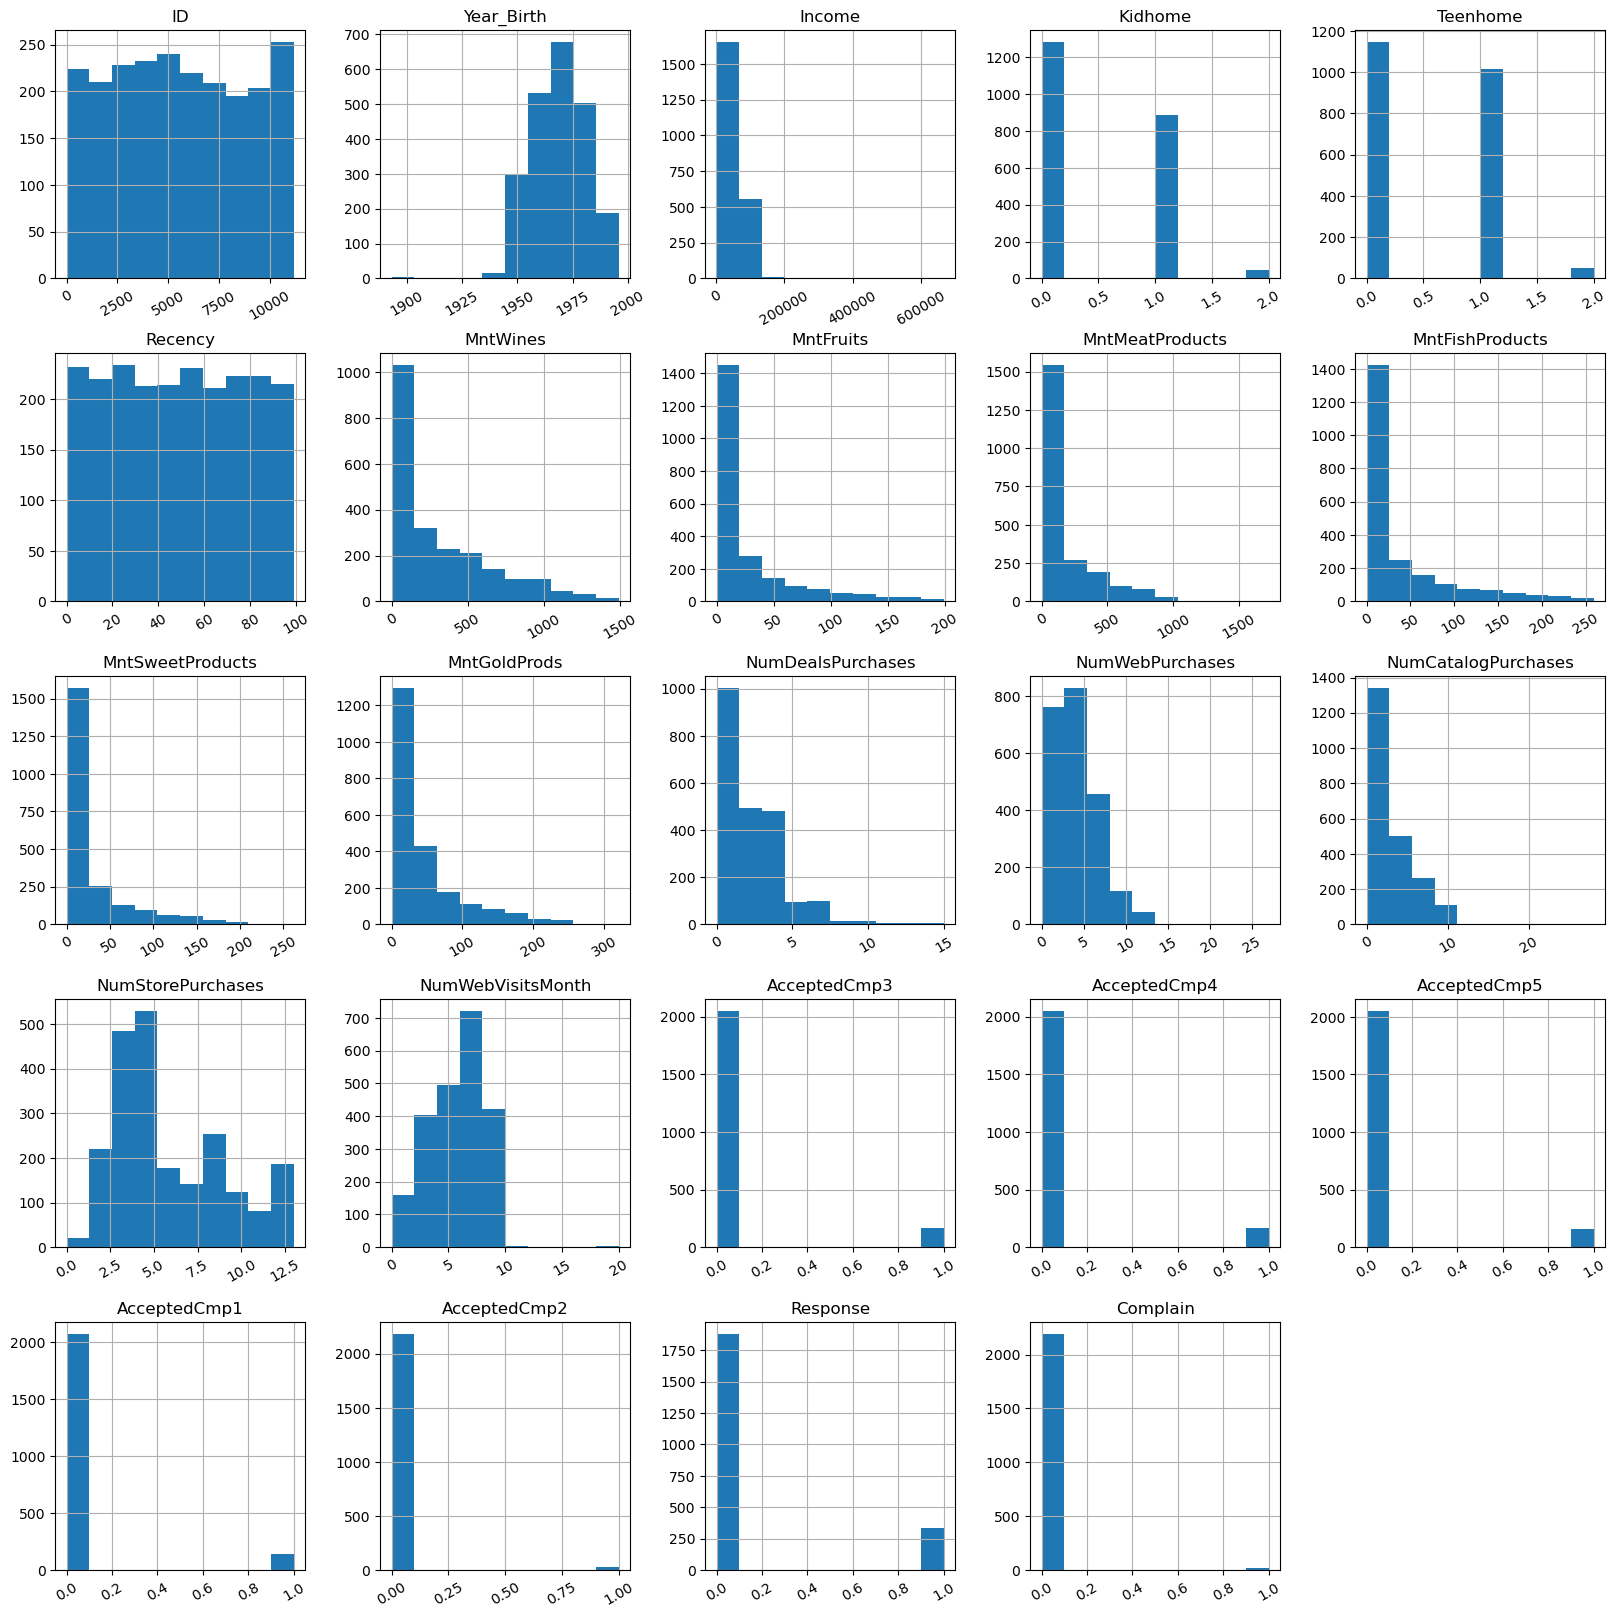

In [14]:
#Show all distributions of all the features in the dataset except Country, Income, Education, Martial_Status
df.hist(figsize=(20,20), xrot = 30) 
plt.show()

We need to check if there are outliers or another strange things in the dataset:

In [15]:
# Found all unique values of Year_Birth of each customer
df["Year_Birth"].value_counts() 

1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1952    52
1977    52
1958    52
1968    51
1959    50
1966    50
1960    49
1954    49
1955    48
1982    44
1967    44
1963    44
1962    44
1951    42
1986    41
1983    41
1957    41
1964    41
1980    39
1984    38
1981    38
1961    35
1953    35
1985    32
1949    30
1989    29
1950    29
1988    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     6
1993     5
1995     5
1994     3
1996     2
1893     1
1899     1
1941     1
1940     1
1900     1
Name: Year_Birth, dtype: int64

Year_Birth - there are outliers such as 1900, 1899, 1893 - people simply can't live for so long.
Let's drop customers who were born before 1900.

In [16]:
# Drop customers who were born before 1900.
df.drop(df[df['Year_Birth'] <= 1900].index, inplace = True) 

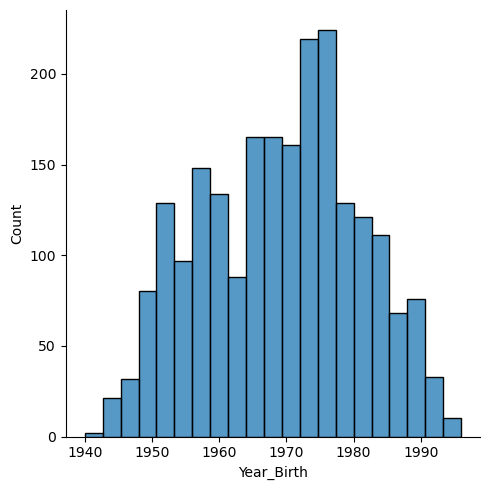

In [17]:
#Distribution of Year_Birth feature
sns.displot(df['Year_Birth']) 
plt.show()

In [18]:
# Number of teens in customers' families
df["Teenhome"].value_counts() 

0    1145
1    1017
2      51
Name: Teenhome, dtype: int64

In [19]:
#Number of kids in customers' families
df["Kidhome"].value_counts() 

0    1281
1     886
2      46
Name: Kidhome, dtype: int64

1. Teenhome - 1145 have 0 teens, 1017 have 1 teen, 51 have 2 teens
2. Kidhome - 1281 have 0 kids, 886 have 1 child, 46 have 2 kids
3. Dt_Customer - customers join this company at the different time, at first glance nothing unusual

In [20]:
#Quantiles, mean, std of Recency feature
df["Recency"].describe() 

count    2213.000000
mean       49.007682
std        28.941864
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

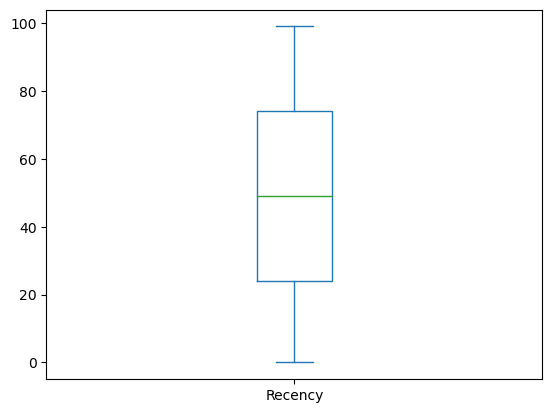

In [21]:
#Box plot distribution of Recency
df["Recency"].plot.box() 
plt.show()

Recency - number of days since last purchase. Mean - 49 days since the last purchase.
MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds - those features are right-skewd.

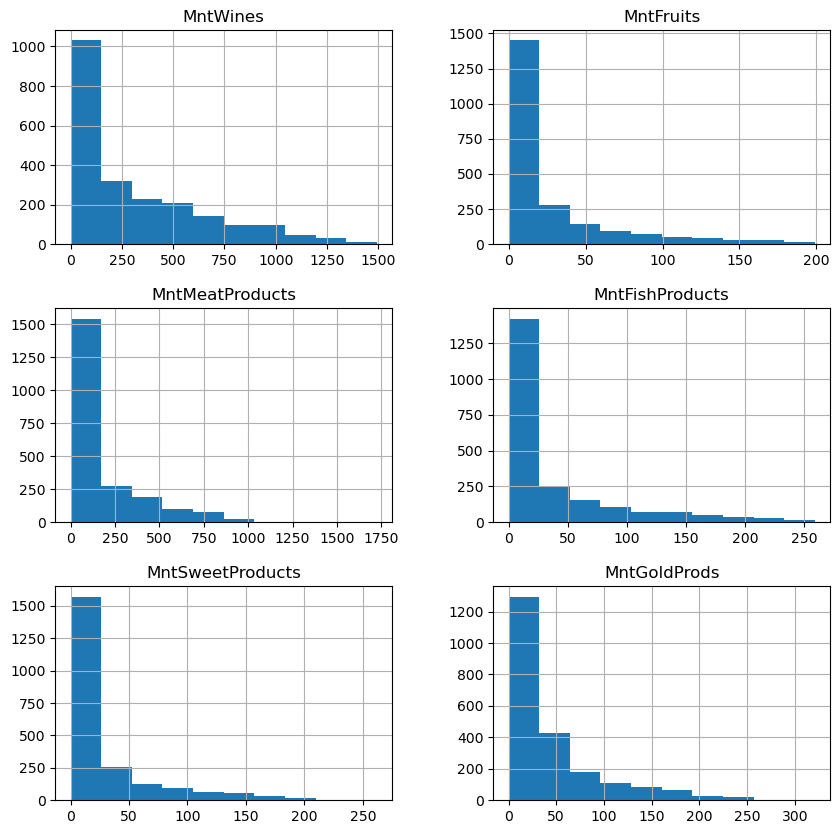

In [22]:
df[["MntWines","MntFruits", "MntMeatProducts", "MntFishProducts","MntSweetProducts","MntGoldProds"]].hist(figsize = (10,10)) 
#Histogram of Mnt of all products
plt.show()

NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumWebVisitsMonth, NumStorePurchases - it's alright.
Let's check Income, Country, Education, Marital_Status:

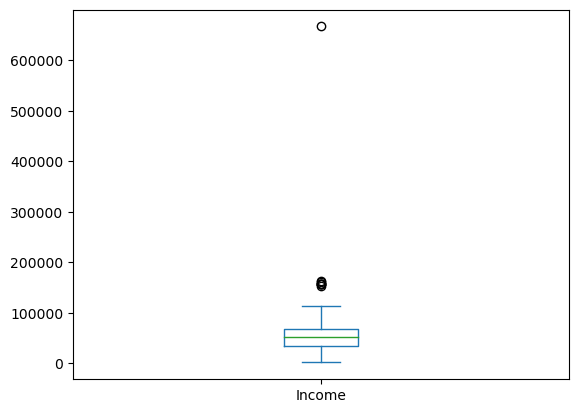

In [23]:
#Box plot distribution of Income
df["Income"].plot.box() 
plt.show()

In [24]:
#Quantiles, mean, std of Income feature
df["Income"].describe() 

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

Income - there is one possible outlier, one customer has 666666 $ - maybe, it's a mistake, let's drop it.

In [25]:
#Drop one customer, who has 666666 $ income.
df.drop(df[df['Income'] == 666666].index, inplace = True) 

Country - let's make a bar plot to see where our customers are located:

In [26]:
 #Group customers by Country
df.groupby(by = "Country").count()["ID"]

Country
AUS     147
CA      266
GER     116
IND     146
ME        3
SA      335
SP     1092
US      107
Name: ID, dtype: int64

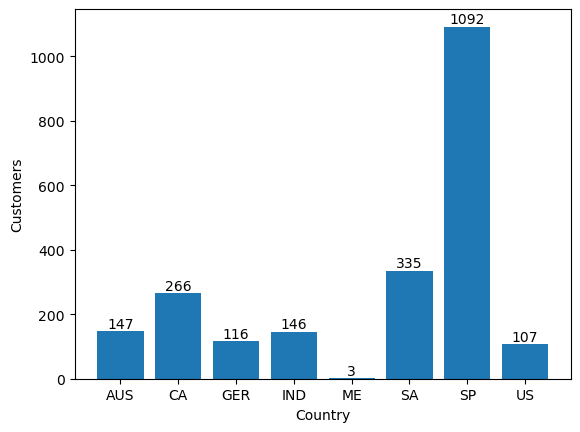

In [27]:
plot = plt.bar(df.groupby(by = "Country").count()["ID"].index.to_list(), df.groupby(by = "Country").count()["ID"].to_list())

#Add the data value on head of the bar
for value in plot:  
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')

plt.xlabel("Country")  
plt.ylabel("Customers")

plt.rcParams["figure.figsize"] = (10,6) 
plt.show()

Country - mostly, customers are located in Spain, Saudi Arabia and Canada.

Education - donut plot to visualize:

In [28]:
#Group customers by Education
df.groupby(by = "Education").count()["ID"] 

Education
2n Cycle       198
Basic           54
Graduation    1115
Master         365
PhD            480
Name: ID, dtype: int64

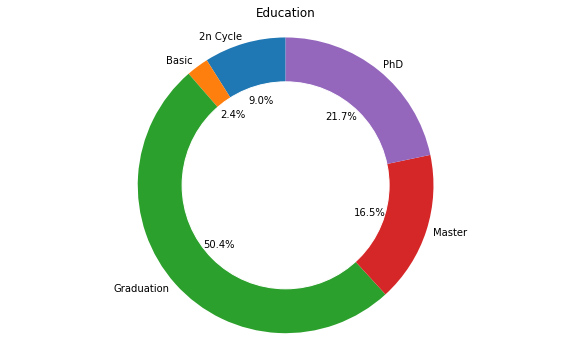

In [77]:
labels = df.groupby(by = "Education").count()["ID"].index.to_list()
sizes = df.groupby(by = "Education").count()["ID"].to_list()

my_circle = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie(sizes, labels=labels, autopct='%1.1f%%',
            startangle=90, labeldistance=1.05)
plt.axis('equal')
plt.gca().add_artist(my_circle)

plt.title("Education")
plt.show()

It is seen that 50% of the customers have Graduation.

In [20]:
df["Marital_Status"].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

Marital_Status: there are 7 outliers - let's drop it.

In [29]:
df.drop(df[df['Marital_Status'] == "YOLO"].index, inplace = True)
df.drop(df[df['Marital_Status'] == "Absurd"].index, inplace = True)
df.drop(df[df['Marital_Status'] == "Alone"].index, inplace = True)

The number of married clients is more than widow or divorce.

_______________________________________________________________________________________________________________________________

Let's plot a correlation matrix to show correlation coefficients between variables.

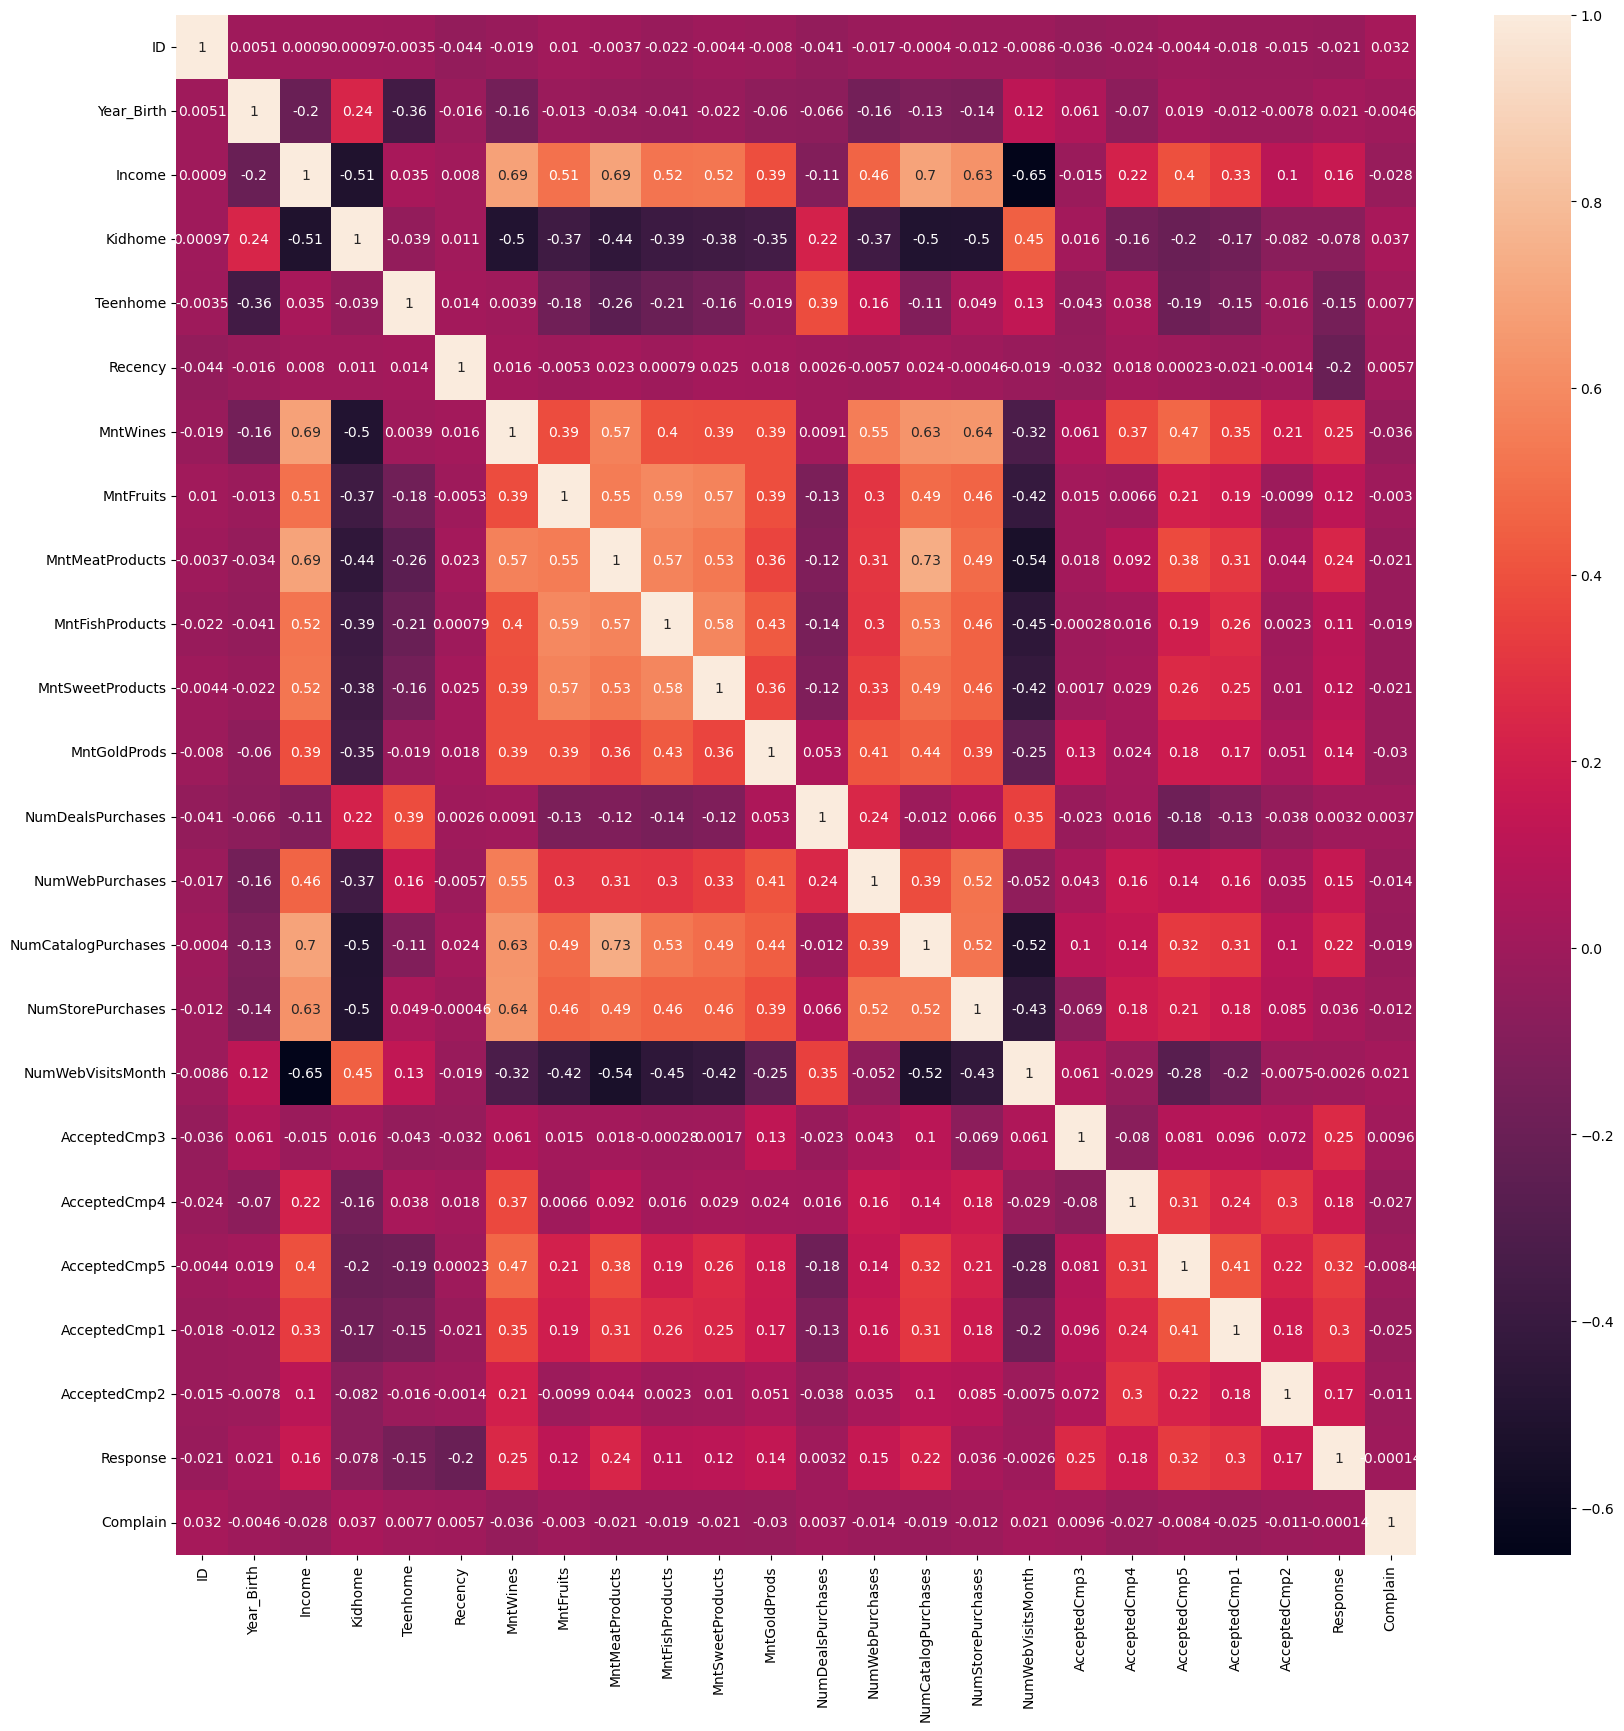

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In my opinion, this correlation matrix is too noisy - there are too many variables to obtain some insights.
Let's use feature engineering to reduce dimensionality of the data.
1. AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5 - unite to one --> "AcceptedCmp"
2. MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds --> "Spendings"
3. Kidhome, Teenhome --> "Children"
4. NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases --> "TotalPurchases"

In [31]:
df["AcceptedCmp"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"] + df["AcceptedCmp5"]
df["Spendings"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] +  df["MntGoldProds"]
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["LastCmp"] = df["Response"]
df["TotalPurchases"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
 #Create new Dataframe
df1 = df[["ID", "Year_Birth", "Education", "Marital_Status", "Income",
          "Children", "Dt_Customer", "Recency", "Spendings", "TotalPurchases",
          "NumWebVisitsMonth", "AcceptedCmp", "LastCmp", "Complain", "Country"]]

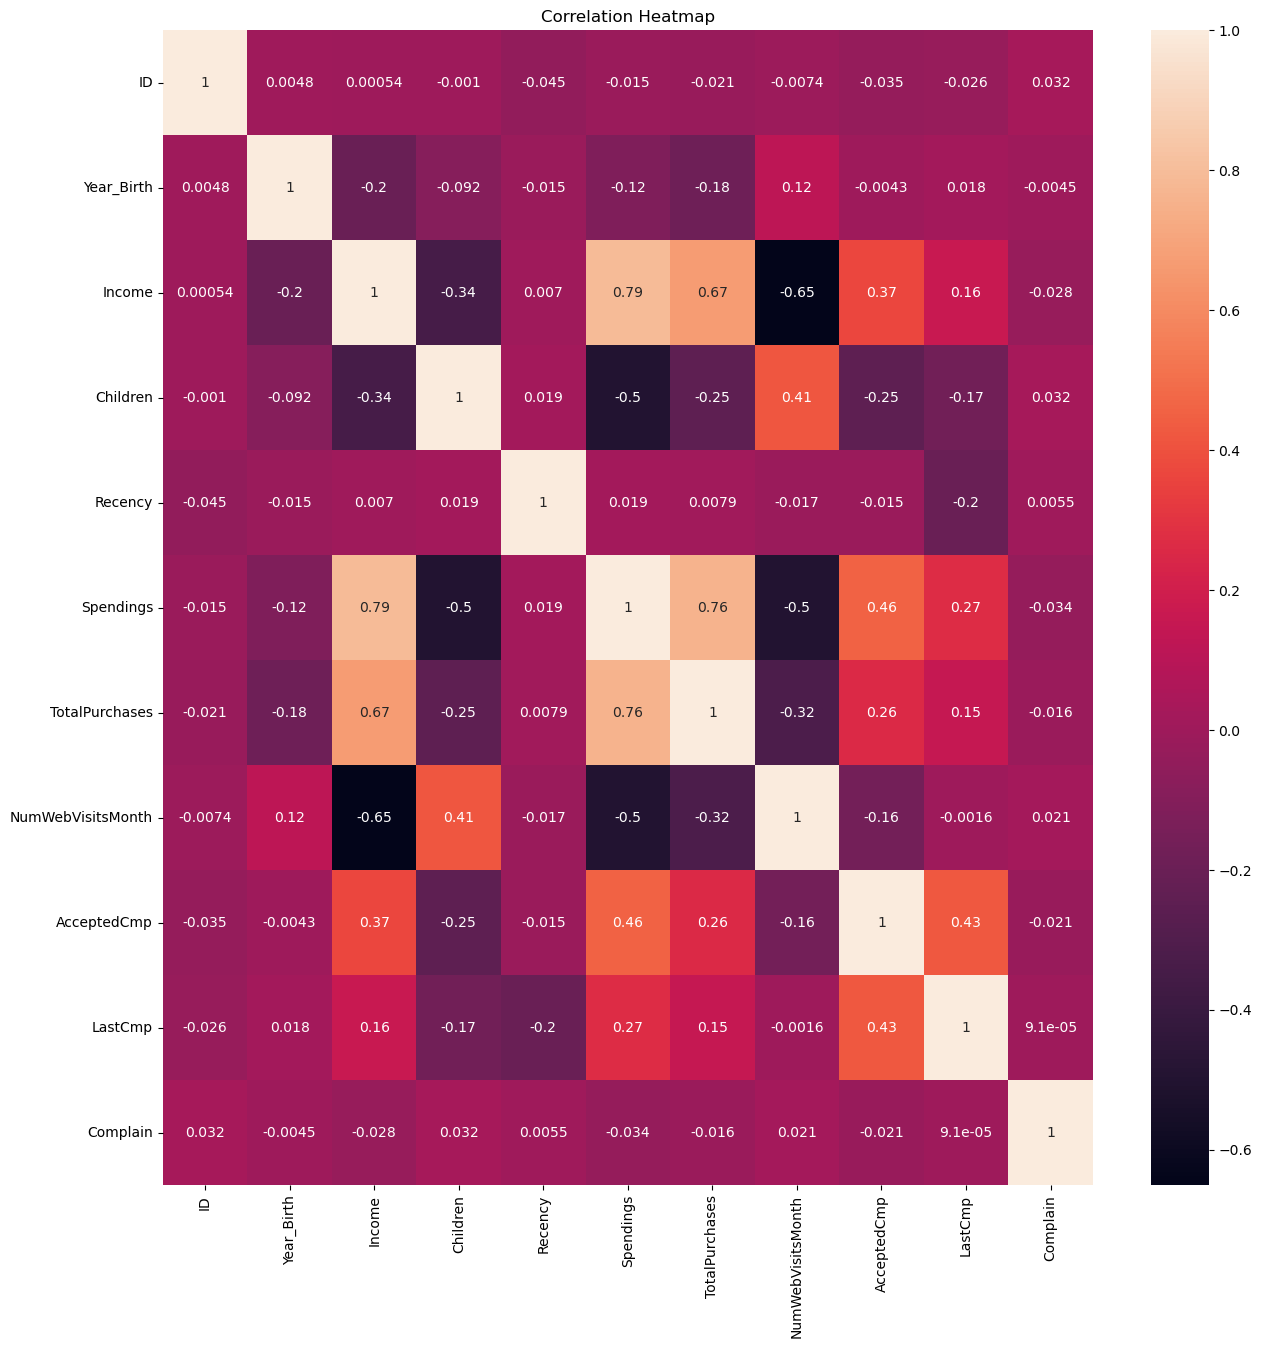

In [35]:
#Corellation Heatmap
plt.figure(figsize=(15,15)) 
plt.title(label = "Correlation Heatmap")
sns.heatmap(df1.corr(), annot=True)
plt.show()

From Correlation Heatmap:
1. Income <--> Spendings, TotalPurchases, 0.79/0.67 - positive correlation. The more customers have money, the more they spend and purchase.
2. Income <--> NumWebVisitsMonth, -0.65 - negative correlation. The more customers have money, the less they visit our website. Note: there might be something wrong with the website - it doesn't seem like it's attractive to the customers.
3. Children <--> Spendings, -0.5 - negative correlation. Custorers that have children tend to spend less.
4. Children <--> NumWebVisitsMonth, 0.42 - positive corr.
5. Spendings <--> TotalPurchases, 0.76 - positive corr.
6. Spendings <--> NumWebVisitsMonth, -0.5 - negative corr.
7. Spendings <--> AcceptedCmp, 0.46 - positive corr.
8. AcceptedCmp <--> LastCmp, 0.43 - positive corr. People are more likely to accept the last marketing campaign if they accepted at least one of the previous campaigns.
9. Complain <--> all other features, almost 0 corr.

Next - let's use a pivot table to see where people accepted 5 previous campaigns and the last one the most.

In [36]:
df.pivot_table(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], ["Country"], aggfunc="sum")

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Country,,,,,,
AUS,6,0,9,6,11,21
CA,18,6,17,24,21,37
GER,7,2,10,11,8,17
IND,7,2,13,10,6,12
ME,0,0,1,0,0,2
SA,20,4,21,20,21,52
SP,76,16,83,87,88,176
US,7,0,8,6,5,13


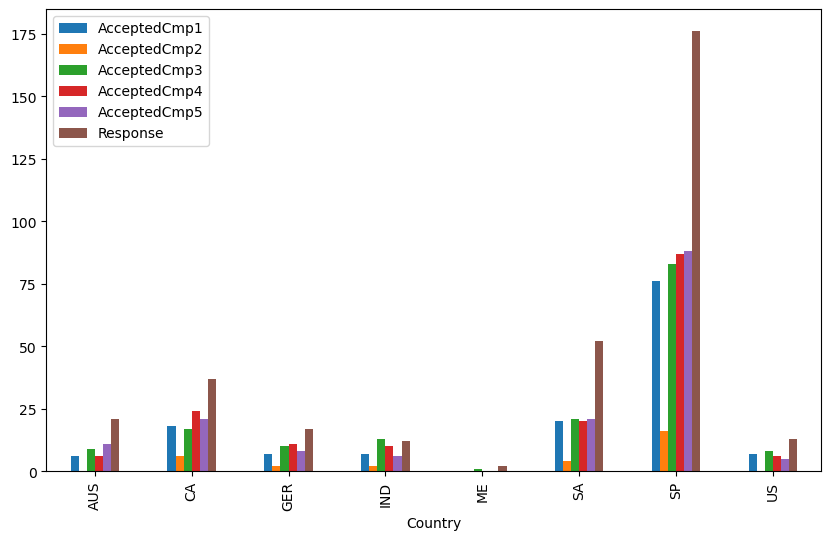

In [37]:
df.pivot_table(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], ["Country"], aggfunc="sum").plot.bar()
plt.show()

Every marketing campaign is successful in Spain - it should be the main country to conduct marketing campaigns.
The most successful campaign is the last one.
The least successful campaign is second one.
The least successful region is ME.

Pivot table to see what education our customers have. (For customers, who accepted those campaigns).

In [38]:
df.pivot_table(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], ["Education"], aggfunc="sum")

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Education,,,,,,
2n Cycle,14,2,15,9,10,22
Basic,0,0,6,0,0,2
Graduation,79,16,78,79,85,151
Master,18,2,24,31,27,56
PhD,30,10,39,45,38,99


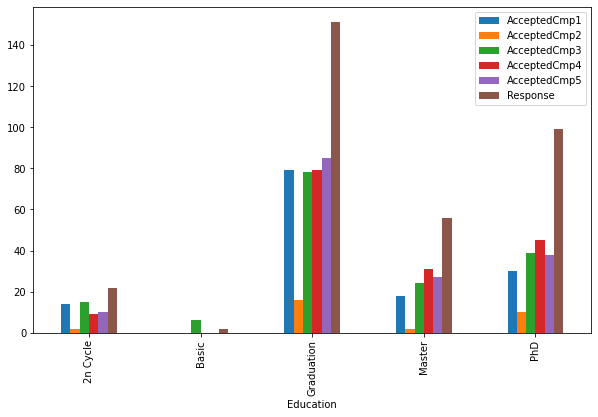

In [86]:
df.pivot_table(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"], ["Education"], aggfunc="sum").plot.bar()
plt.show()

Graduate customers accepted all marketing campaigns the most.

Let's see what income our customers have according to their education. (For customers, who accepted previous 5 campaigns).

In [39]:
df1.pivot_table(["Income"], ["Education","AcceptedCmp"], aggfunc="mean")

Income
Education  AcceptedCmp              
2n Cycle   0            43216.571429
           1            62822.111111
           2            75881.714286
           3            81526.333333
Basic      0            20295.479167
           1            20392.500000
Graduation 0            48524.405192
           1            60133.364780
           2            77748.088235
           3            83638.730769
           4            85497.625000
Master     0            49320.653979
           1            61559.611111
           2            77433.384615
           3            85398.000000
           4            91172.000000
PhD        0            53775.087671
           1            58700.093333
           2            72110.576923
           3            79447.333333
           4            84662.500000

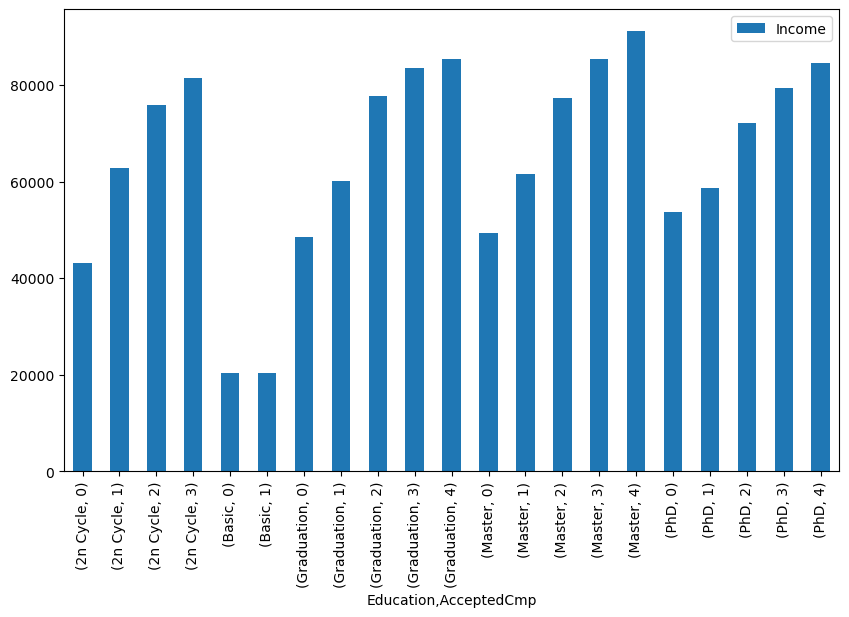

In [40]:
df1.pivot_table(["Income"], ["Education","AcceptedCmp"], aggfunc="mean").plot.bar()
plt.show()

Customers with Master degree and 4 accepted campaigns earn the most in average.

In [41]:
df1.pivot_table(["Income"], ["Education","LastCmp"], aggfunc="mean")

Income
Education  LastCmp              
2n Cycle   0        46597.414773
           1        55848.681818
Basic      0        20377.423077
           1        18456.000000
Graduation 0        50805.805613
           1        60799.112583
Master     0        51737.478827
           1        59012.071429
PhD        0        54640.949735
           1        61973.343434

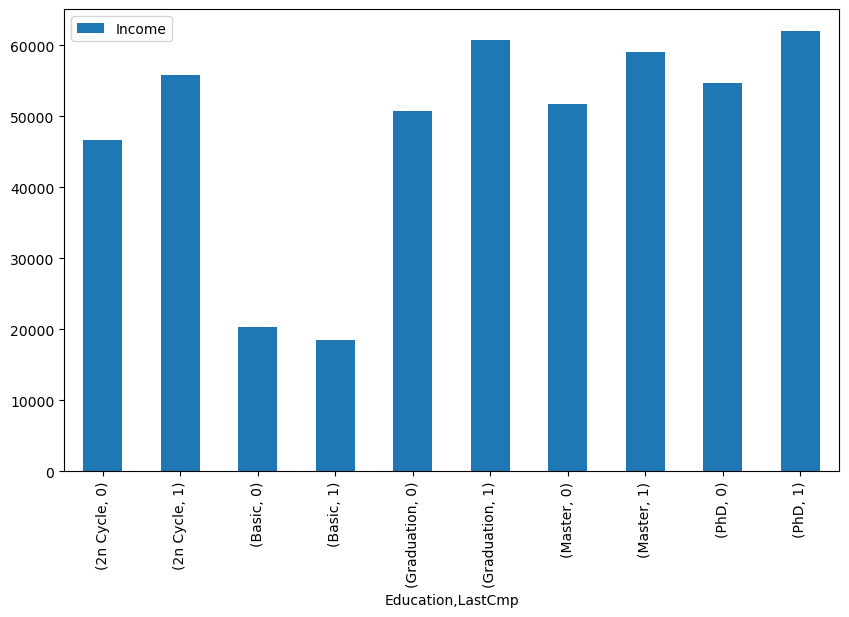

In [42]:
df1.pivot_table(["Income"], ["Education","LastCmp"], aggfunc="mean").plot.bar()
plt.show()

Customers with PhD degree and last accepted campaign earn the most in average.

As the last campaign is the most successful, let's see what products our customers buy.

In [43]:
df.pivot_table(["MntWines","MntFruits","MntMeatProducts","MntSweetProducts","MntGoldProds"], ["Response"], aggfunc="sum")

,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Response,,,,,
0,45525,76501,271025,47027,506824
1,12529,20090,97641,12712,166563


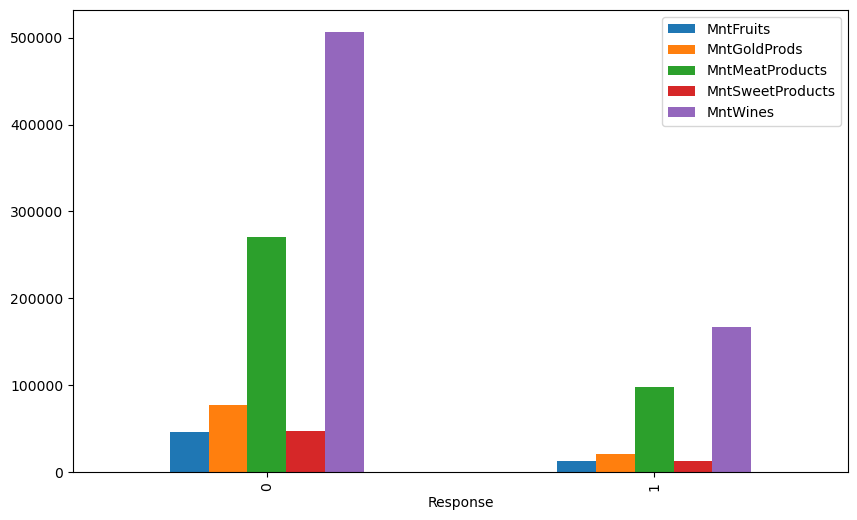

In [44]:
df.pivot_table(["MntWines","MntFruits","MntMeatProducts","MntSweetProducts","MntGoldProds"], ["Response"], aggfunc="sum").plot.bar()
plt.show()

Customers who accepted the last campaign buy MntWines and MntMeatProducts the most, MntFruits the least.

In [45]:
df.pivot_table(["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"], ["Response"], aggfunc="sum")

,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases
Response,,,,
0,4505,4346,10797,7330
1,1387,771,2010,1677


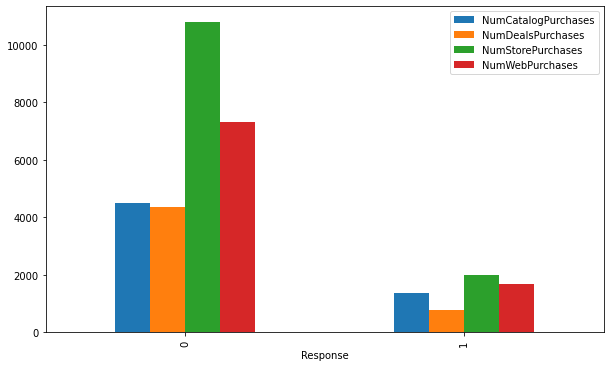

In [94]:
df.pivot_table(["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases"], ["Response"], aggfunc="sum").plot.bar()
plt.show()

Customers who accepted the last campaign buy through the store the most and with a discount the least.

In [46]:
#Average income of those who accepted the last campaign
df1[df1["LastCmp"] == 1].mean()["Income"] 

60261.472727272725

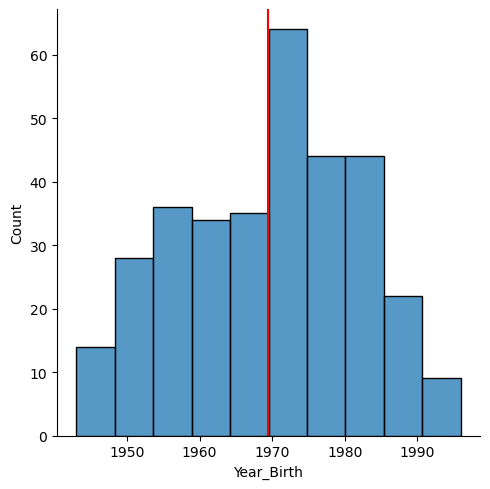

In [47]:
#Distribution of Year_Birth feature of those customers who accepted last campaign
sns.displot(df1['Year_Birth'][df1["LastCmp"] == 1]) 
plt.axvline(x=df1['Year_Birth'][df1["LastCmp"] == 1].mean(), color='red')
plt.show()

In [49]:

# Convert the 'Dt_Customer' column to datetime if it isn't already
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'], errors='coerce')
#Count month when customers enroll with the company
month_counts = df1["Dt_Customer"][df1["LastCmp"] == 1].dt.month.value_counts()
print(month_counts)



8     46
9     41
10    37
11    33
1     30
2     28
3     26
5     23
4     22
12    17
6     16
7     11
Name: Dt_Customer, dtype: int64


In [50]:
 #Count days of week when customers enroll with the company
df1["Dt_Customer"][df1["LastCmp"] == 1].dt.weekday.value_counts()

0    58
2    54
4    51
1    50
5    46
3    41
6    30
Name: Dt_Customer, dtype: int64

Customers who accepted the last campaign usually enroll on Monday in August.

In [51]:
#Count Marital_Status of customers of those who accepted last campaign
df1["Marital_Status"][df1["LastCmp"] == 1].value_counts() 

Single      106
Married      98
Together     60
Divorced     48
Widow        18
Name: Marital_Status, dtype: int64

Customers who accepted the last campaign usually single.

_______________________________________________________________________________________________________________________________

# Hypothesis testing:

1) Is the average salary of PhD owners statistically different from others?

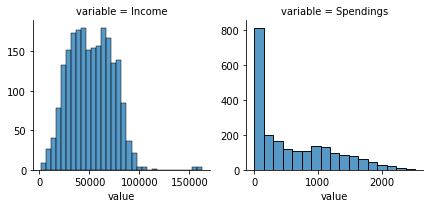

In [100]:
df3 = pd.DataFrame(data = df1, columns = ["Income", "Spendings"])
nd = pd.melt(df3, value_vars = df3)
n1 = sns.FacetGrid(nd, col = "variable", col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.histplot, "value")
plt.show()

Seems like that none of the distributions are Gaussian distributions.

1. H0: The mean of the two groups are equal --> it's not statistically different
2. H1: The mean of the two groups are not equal --> it is statistically different 

Let's use alpha at 5% significance level.
Let's use the Mann-Whitney's test (nonparametric test) to determine whether one group has higher or lower salary than the other group.

In [101]:
Diploma=df1[["Education", "Income"]]
Phd_graduate=Diploma[Diploma["Education"] == "PhD"]
Master_graduate=Diploma[Diploma["Education"] == "Master"]
print("PhD: median = %.0f stdv = %.1f" % (np.median(Phd_graduate.Income), np.std(Phd_graduate.Income)))
print("Master: median = %.0f stdv = %.1f" % (np.median(Master_graduate.Income), np.std(Master_graduate.Income)))
alpha = 0.05
print(stats.mannwhitneyu(Phd_graduate.Income, Master_graduate.Income))

PhD: median = 55212 stdv = 20612.7
Master: median = 50898 stdv = 20169.8
MannwhitneyuResult(statistic=78781.5, pvalue=0.012635282675953605)


Thus, p-value is smaller that 0.05. We can conclude, that means of the two groups are statistically different - we reject H0.

# Data Visulaization

# Which marketing campaign is most successful?¶

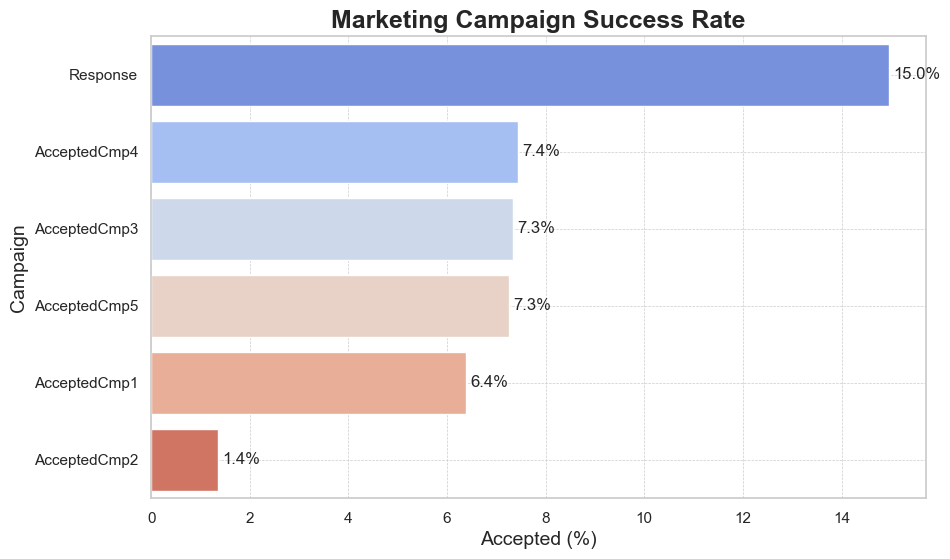

In [54]:

# calculate success rate (percent accepted)
cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100, 
                           columns=['Percent']).reset_index()

cam_success = cam_success.sort_values('Percent', ascending=False)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Percent', y='index', data=cam_success, palette='coolwarm')

# add value annotations
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', padding=3, fontsize=12)

# enhance labels and title
plt.xlabel('Accepted (%)', fontsize=14)
plt.ylabel('Campaign', fontsize=14)
plt.title('Marketing Campaign Success Rate', fontsize=18, weight='bold')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)



# •	Display the total amount spent by a customer in each product category.

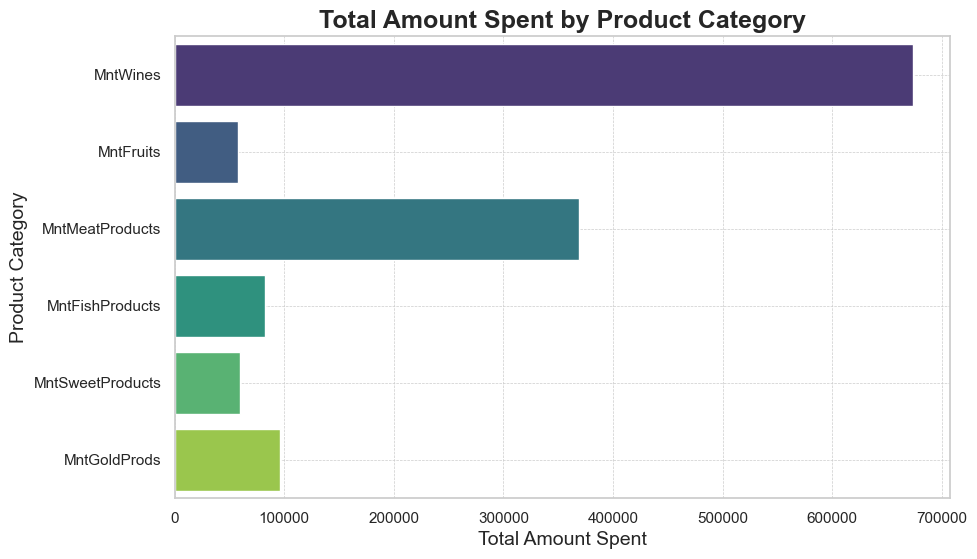

In [56]:
# Calculate the total amount spent on each product category
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spent = df[product_columns].sum()
# Convert to DataFrame for visualization
total_spent_df = total_spent.reset_index().rename(columns={'index': 'Product Category', 0: 'Total Amount Spent'})

plt.figure(figsize=(10, 6))
sns.barplot(x='Total Amount Spent', y='Product Category', data=total_spent_df, palette='viridis')
plt.title('Total Amount Spent by Product Category', fontsize=18, weight='bold')
plt.xlabel('Total Amount Spent', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


# •	What is the average spending in each age group?

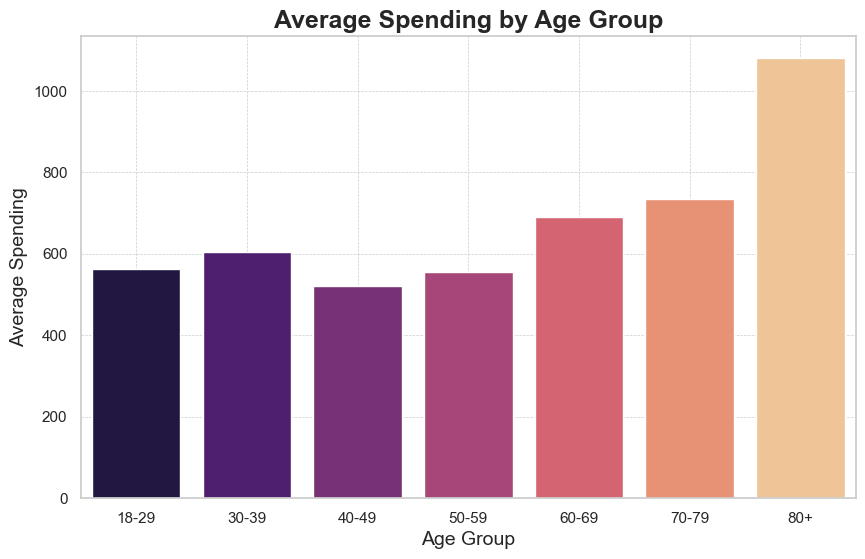

In [57]:

df['Age'] = 2024 - df['Year_Birth']

df['Total_Spending'] = df[product_columns].sum(axis=1)

# Define age groups
bins = [18, 30, 40, 50, 60, 70, 80, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate average spending by age group
avg_spending_age_group = df.groupby('Age_Group')['Total_Spending'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Total_Spending', data=avg_spending_age_group, palette='magma')
plt.title('Average Spending by Age Group', fontsize=18, weight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Spending', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


# •	Which products are performing best, and which are performing the least in terms of revenue? Analyze the data and plot a suitable graph to display a report on revenue generated by different products.

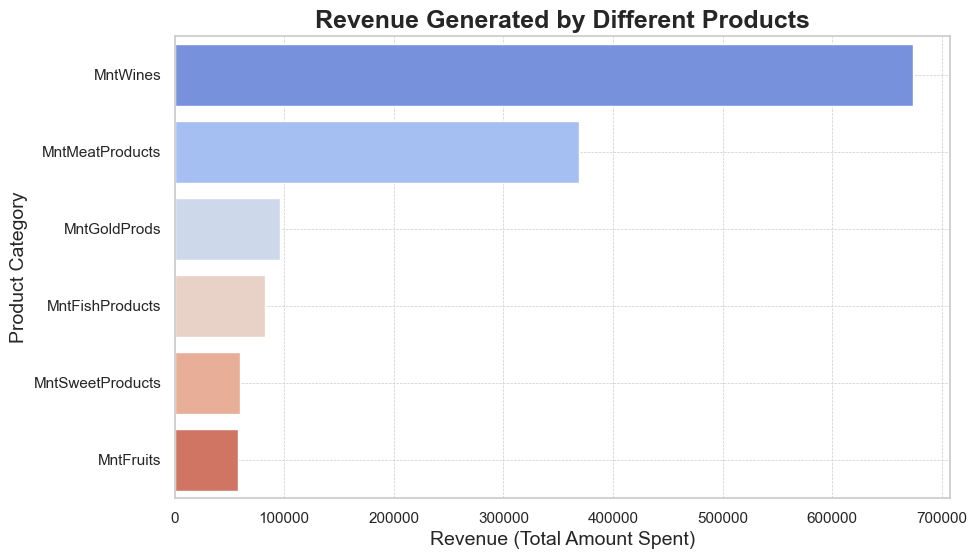

In [58]:
# Plot total revenue by product category
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Amount Spent', y='Product Category', data=total_spent_df.sort_values('Total Amount Spent', ascending=False), palette='coolwarm')
plt.title('Revenue Generated by Different Products', fontsize=18, weight='bold')
plt.xlabel('Revenue (Total Amount Spent)', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


# •	Which Country has the greatest number of customers who accepted the last campaign. 

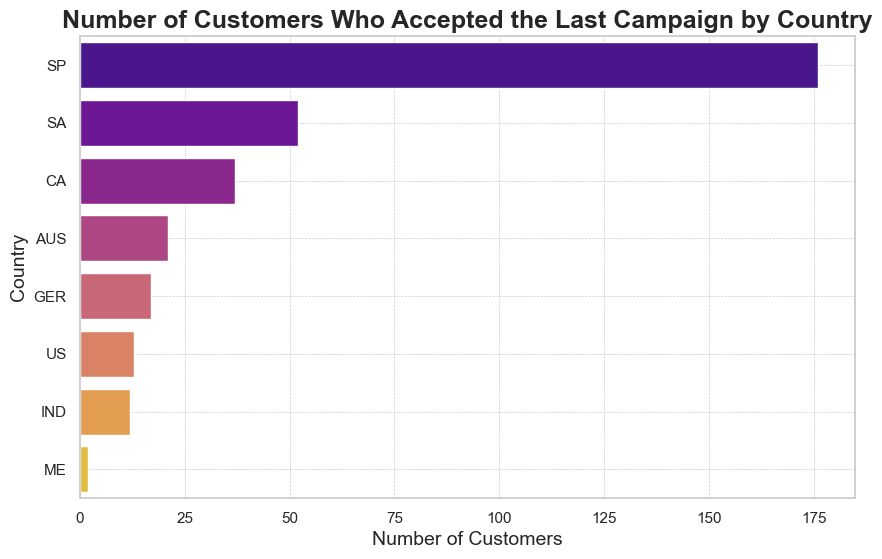

In [60]:
# Filter customers who accepted the last campaign
accepted_last_campaign = df[df['Response'] == 1]

# Count the number of customers per country
country_acceptance = accepted_last_campaign['Country'].value_counts().reset_index()
country_acceptance.columns = ['Country', 'Number of Customers']

# Plot the number of customers who accepted the last campaign by country
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Customers', y='Country', data=country_acceptance, palette='plasma')
plt.title('Number of Customers Who Accepted the Last Campaign by Country', fontsize=18, weight='bold')
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


# Summary:
1. The last campaign performed the best opposing to the previous campaigns. Second campaign is the worst.
2. The most successful regions for marketing campaigns are: Spain, Saudi Arabia, Canada. ME region is the least successful.
3. People who accepted the last campaign:
    - Located in Spain
    - Have Graduation, PhD
    - Buy wine and meat products the most, fruits the least
    - Buy through the store the most, with a discount the least
    - Have 60000$ income in average
    - Born in 1970 approximately
    - Enroll with the company in August
    - Usually, enroll on Monday
    - Are usually single
4. Customers with kids spend and purchase less.


# Data-driven solutions:
1. It's better to use the same marketing campaign as the last campaign is the most successful.
    - (Also, keep on focusing on wine and meat products)
2. In order to attract new customers make promotions and discounts on Monday in August.
3. Prioritize the Spanish market.
4. Change web-site of the company as customers with high income are less likely to shop online on this web-site.

In [ ]:
I AM ATTACHING A POWER BI DASHBOARD TOO TO AUTOMATE THE VISUALS OF THIS PROJECT.